In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import pyarrow
import itertools

In [7]:
df = pd.read_csv("contestants.csv", engine="pyarrow")

In [8]:
df.groupby("year")["to_country"].count().reset_index()

,year,to_country
0,1956,12
1,1957,10
2,1958,10
3,1959,11
4,1960,13
...,...,...
60,2016,42
61,2017,42
62,2018,43
63,2019,41


ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

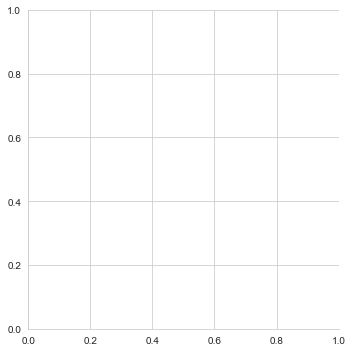

In [9]:
sns.set_style("whitegrid")
sns.relplot(data=df.groupby('year')['to_country'].count().reset_index(), kind='line')

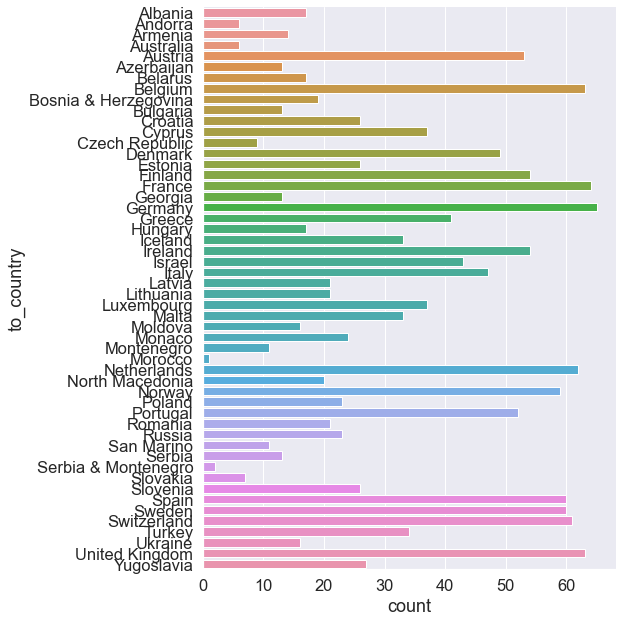

In [15]:
sns.catplot(data=df.sort_values("to_country"), kind="count", y="to_country", height=9)

In [16]:
df["wining_position"] = df.loc[df["place_final"].isin([1.0, 2.0, 3.0]), "place_final"]

In [17]:
df["wining_position"] = df["wining_position"].fillna("None")

In [18]:
df["wining_position"]

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
1598    None
1599    None
1600    None
1601    None
1602    None
Name: wining_position, Length: 1603, dtype: object

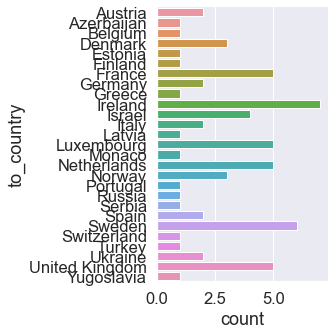

In [19]:
sns.catplot(data=df.loc[df["wining_position"] == 1, ["to_country"]].sort_values("to_country"), 
            kind="count", y="to_country")

<AxesSubplot:xlabel='year', ylabel='points_final'>

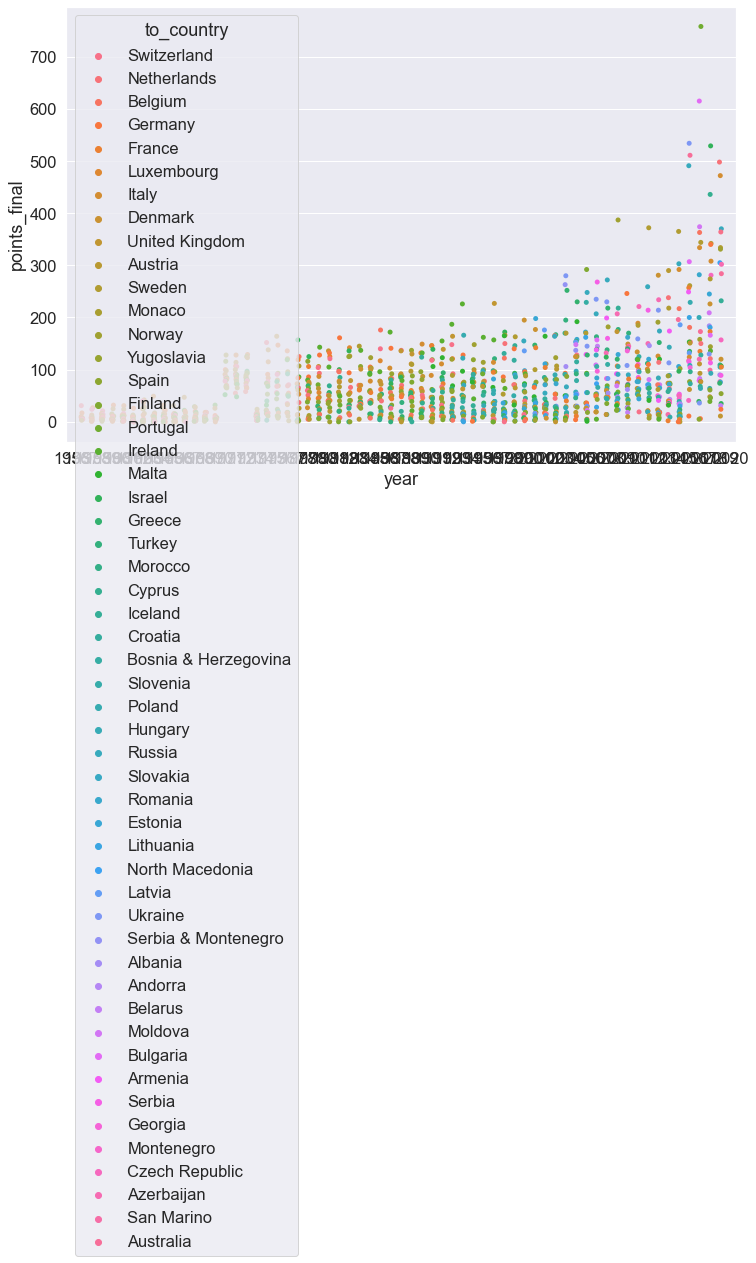

In [21]:
sns.stripplot(data=df, x="year", y="points_final", hue="to_country")

In [27]:
class SimpleGrade:
    def __init__(self):
        self._grades = {}
        
    def add_student(self, name):
        self._grades[name] = []
        
    def report_grade(self, name, score):
        self._grades[name].append(score)
     
    
    def average_grade(self, name):
        grades = self._grades[name]
        return sum(grades) / len(grades)
        
book = SimpleGrade()
book.add_student('Isaac Newton')
book.report_grade('Isaac Newton', 90)
book.report_grade('Isaac Newton', 95)
book.report_grade('Isaac Newton', 85)

print(book.average_grade('Isaac Newton'))

90.0
